In [3]:
!pip install ftfy

     |████████████████████████████████| 71kB 6.0MB/s 
  Created wheel for ftfy: filename=ftfy-5.9-cp37-none-any.whl size=46451 sha256=462a9e5c28d9039b0e48c37381ed4ba4871d9fd9f276236f2b2f6c37d764aecb
  Stored in directory: /root/.cache/pip/wheels/5e/2e/f0/b07196e8c929114998f0316894a61c752b63bfa3fdd50d2fc3
Successfully built ftfy


In [4]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=a758491a1bd4a6c7fc68144257bf3584328ad984bed57b17742e99675d35d77a
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [5]:
# for ocr  

!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 30 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,899 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [60]:
import os
import ftfy
import pytesseract
import re
import math
from scipy import ndimage
import cv2
import numpy as np

# reading file from path
def pan(image_path):
    
    img = cv2.imread(image_path)
    img_before = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img_before, cv2.COLOR_BGR2GRAY)# converting image to gray scale to remove noise and colour complexity
    img_edges = cv2.Canny(img_gray, 100, 100, apertureSize=3)# canny edge detector detects edges in an image
    
#Calculating rotation angle of the image
    lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5 )#detects any shape but here horizontal lines if any

    # Caclulating angle of lines detected 
    angles = []

    for [[x1, y1, x2, y2]] in lines:
        cv2.line(img_before, (x1, y1), (x2, y2), (255, 0, 0), 3)
        angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
        angles.append(angle)
    median_angle = np.median(angles)
    print("image rotated by",median_angle,"angle")
    
    

# If-else block to check and rotate image and applying  pytesseract on final rotated images
    if median_angle!=0:
        img_rotated = ndimage.rotate(img, (median_angle*2-1))
    # extracting text from image using tesseract
        text = pytesseract.image_to_string(img_rotated)
    else:
        text = pytesseract.image_to_string(img_gray)

    text = ftfy.fix_text(text)

    
    
# Applying regex to obtain date(dob) and Pan number
    dob=re.search(r'\d{2}/\d{2}/\d{4}', text)    # regex for date of birth
    pan_no=re.search('[A-Z]{5}[0-9]{4}[A-Z]{1}',text)  #regex for pan_number
    print("pan card number:",pan_no.group()) 
    print("dob on pan card:",dob.group())
    # bounding_box(img)

def bounding_box(img):

    cord = output[index][0]
    cord1 = output[index1][0]

    x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
    x_max, y_max = [int(max(idx)) for idx in zip(*cord)]
    x1_min, y1_min = [int(min(idx)) for idx in zip(*cord1)]
    x1_max, y1_max = [int(max(idx)) for idx in zip(*cord1)]

    # image = cv2.imread(img)
    cv2.rectangle(img,(x_min,y_min),(x_max,y_max),(0,0,255),2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    cv2.rectangle(image,(x1_min,y1_min),(x1_max,y1_max),(0,0,255),2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [61]:
pan('/content/sample_data/card1.jpg')
pan('/content/sample_data/card2.jpg')


image rotated by 0.0 angle
pan card number: ELWPM8089J
dob on pan card: 30/01/1997
image rotated by 0.0 angle
pan card number: BXAPC1000L
dob on pan card: 13/09/1996


In [62]:
pan('/content/sample_data/card3.jpg')

image rotated by -45.0 angle
pan card number: BGYPJ0129A
dob on pan card: 18/03/1996


image rotated by 0.0 angle
pan card number: BXAPC1000L
dob on pan card: 13/09/1996


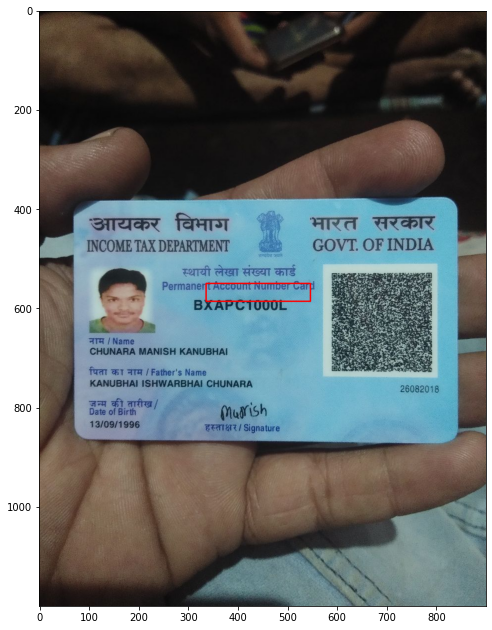

In [45]:
ocr_on_pan('/content/sample_data/card2.jpg')